# Data Preprocessing and Feature Selection

Data preprocessing: Enables one to improve the quality of training sets.

Involves handling missing data, encoding categorical data including categorical classes, partitioning the data into training and test sets, scaling or standardizing the data, and selecting meaningful features.

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [46]:
heart_df=pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart_df.shape

(299, 13)

In [47]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [48]:
heart_df['time'].sample(12)

139    108
186    172
181    150
40      31
137    108
176    147
99      86
274    245
231    208
282    250
180    148
12      11
Name: time, dtype: int64

In [49]:
heart_df.drop(['time'], inplace=True, axis=1)

In [50]:
heart_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,1.00000


In [51]:
def scale_features(X): #similar to what MinMaxScaler does.
    return (X-min(X))/(max(X)-min(X))
    

In [52]:
age=scale_features(heart_df.age)

In [53]:
age[:5]

0    0.636364
1    0.272727
2    0.454545
3    0.181818
4    0.454545
Name: age, dtype: float64

In [54]:
def standardize_features(X): #similar to what StandardScaler does.
    return (X-X.mean())/X.std()
    

In [55]:
age=standardize_features(heart_df.age)
age[:5]

0    1.190949
1   -0.490457
2    0.350246
3   -0.910808
4    0.350246
Name: age, dtype: float64

In [56]:
np.max(age), np.min(age),np.mean(age),np.var(age)

(2.8723543867521872,
 -1.7515113396859823,
 5.465713352000771e-16,
 0.9966555183946488)

In [57]:
X=heart_df.iloc[:,:11]
y=heart_df.iloc[:,11]
X.shape, heart_df.shape, y.shape

((299, 11), (299, 12), (299,))

In [58]:
y[:4]

0    1
1    1
2    1
3    1
Name: DEATH_EVENT, dtype: int64

In [59]:
type(X)

pandas.core.frame.DataFrame

In [60]:
X_copy=heart_df.iloc[:,:12]
X_copy.shape

(299, 12)

In [61]:
#use apply() to standardize the features.
X=X.apply(standardize_features)

In [62]:
X_copy.apply(scale_features)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,1.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,1.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,1.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.400000,0.0,0.004848,1.0,0.363636,1.0,0.157474,0.067416,0.857143,1.0,1.0,0.0
295,0.272727,0.0,0.229268,0.0,0.363636,0.0,0.296884,0.078652,0.742857,0.0,0.0,0.0
296,0.090909,0.0,0.259888,1.0,0.696970,0.0,0.869075,0.033708,0.714286,0.0,0.0,0.0
297,0.090909,0.0,0.304925,0.0,0.363636,0.0,0.139290,0.101124,0.771429,1.0,1.0,0.0


# Select meaningful features

Reducing complexity of models through dimensionality reduction using feature selection
a) <b>Feature selection dimensionality reduction</b>: selects a subset of the original features.
b) <b>Feature extraction dimensionality reduction</b>: derives information from the original features to create new ones.

Consider sequential feature selection algorithms: reduce initial n-dimensional feature space to k-dimensional feature subspace, k<n.

Requires features that are most relevant, remove irrelevant features, reduce noise.


##### a) Sequential Backward Selection(SBS)

Seeks to reduce dimensionality with minimum classifier performance degradation.
Sequentially removes features until the desired features are found. Uses a function to determine
the feature to remove.

In [63]:
#Implementation of SBS
from sklearn.base import clone
from itertools import combinations
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS():
    def __init__(self,estimator,k_features, scoring=accuracy_score, \
                 test_size=0.25, random_state=1):
        self.scoring=scoring
        self.estimator=clone(estimator) #creates a copy of the estimator with same 
                                        #parameters but not the fitted data
        self.k_features=k_features
        self.test_size=test_size
        self.random_state=random_state
        
    def fit(self, X,y):
        X_train, X_test, y_train, y_test=\
            train_test_split(X,y, test_size=self.test_size,random_state=self.random_state)
        dim=X_train.shape[1]
        self.indices_=tuple(range(dim))
        print("---indices",self.indices_)
        print("Data::",X_train.shape, X_test.shape, y_train.shape, y_test.shape)
        print("Data type::",type(X_train), type(y_train))
        self.subsets_=[self.indices_]
        print('---subsets_',self.subsets_)
        score=self._calc_score(X_train, y_train,X_test, y_test, self.indices_)
        self.scores_=[score]
        print("---scores_:",self.scores_)
        
        while dim>self.k_features:
            scores=[]
            subsets=[]
            
            for p in combinations(self.indices_, r=dim-1):
                print("p:",p)
                print(self.indices_)
                score=self._calc_score(X_train, y_train,X_test, y_test,p)
                scores.append(score)
                subsets.append(p)
                
            best=np.argmax(scores)
            self.indices_=subsets[best]
            self.subsets_.append(self.indices_)
            dim-=1
            
            self.scores_.append(scores[best])
        self.k_score_=self.scores_[-1]
        
        return self
    
    def transform(self, X):
        return X[:,self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        #self.estimator.fit(X_train, y_train)
        self.estimator.fit(X_train[:,indices], y_train)
        #y_pred=self.estimator.predict(X_test)
        y_pred=self.estimator.predict(X_test[:,indices])
        score=self.scoring(y_test,y_pred)
        print('---a score::',score)
        return score
                

In [64]:
X=np.copy(X)
y=np.copy(y)

X_train, X_test, y_train, y_test=\
            train_test_split(X,y, test_size=0.3,random_state=0, stratify=y)

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

sbs=SBS(knn, k_features=1)
sbs.fit(X_train,y_train) #why pass X_train and y_train
#we want SBS to create new training subsets for testing (validation) and training.
#Approach is used to avoid  original test data from being used as training set.

---indices (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
Data:: (156, 11) (53, 11) (156,) (53,)
Data type:: <class 'numpy.ndarray'> <class 'numpy.ndarray'>
---subsets_ [(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)]
---a score:: 0.7547169811320755
---scores_: [0.7547169811320755]
p: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
---a score:: 0.7169811320754716
p: (0, 1, 2, 3, 4, 5, 6, 7, 8, 10)
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
---a score:: 0.6981132075471698
p: (0, 1, 2, 3, 4, 5, 6, 7, 9, 10)
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
---a score:: 0.7358490566037735
p: (0, 1, 2, 3, 4, 5, 6, 8, 9, 10)
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
---a score:: 0.6792452830188679
p: (0, 1, 2, 3, 4, 5, 7, 8, 9, 10)
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
---a score:: 0.7924528301886793
p: (0, 1, 2, 3, 4, 6, 7, 8, 9, 10)
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
---a score:: 0.6981132075471698
p: (0, 1, 2, 3, 5, 6, 7, 8, 9, 10)
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
---a score:: 0.7358490566037735
p: (0, 1, 2, 4, 5, 6, 7, 8, 

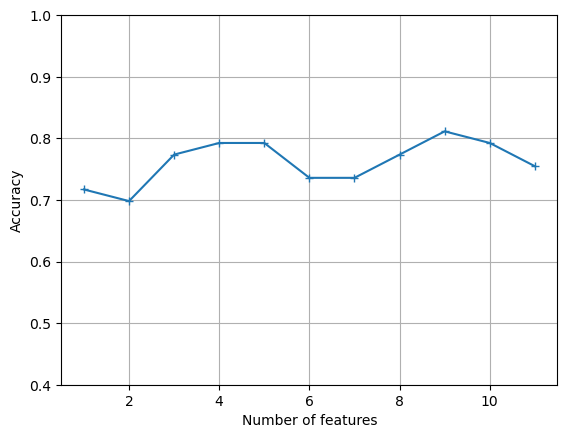

In [66]:
#Plot classification accuracy of KNN on the validation set.
k_feat=[len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_,marker='+')
plt.ylim([0.4,1.0])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [67]:
#Which smallest feature set yielded the good scores (k=3)
#print(sbs.subsets_)
k3=list(sbs.subsets_[8])
print("sub sets:",k3)
print(heart_df.columns[:-1][k3])

sub sets: [1, 3, 4]
Index(['anaemia', 'diabetes', 'ejection_fraction'], dtype='object')


In [68]:
#Evaluate the performance of the model on the original test set---this uses all feature sets
knn.fit(X_train,y_train)
print("Training accuracy: ",knn.score(X_train,y_train))
print("Test accuracy: ",knn.score(X_test,y_test))

Training accuracy:  0.7894736842105263
Test accuracy:  0.6777777777777778


In [69]:
#Evaluate the performance of the model on the original test set---this uses only the three
#significant features
knn.fit(X_train[:,k3],y_train)
print("Training accuracy: ",knn.score(X_train[:,k3],y_train))
print("Test accuracy: ",knn.score(X_test[:,k3],y_test))

Training accuracy:  0.8133971291866029
Test accuracy:  0.6666666666666666


In [70]:
#Which smallest feature set yielded the good scores (k=4)
#print(sbs.subsets_)
k4=list(sbs.subsets_[7])
print("sub sets:",k4)
print(heart_df.columns[:-1][k4])

sub sets: [1, 3, 4, 8]
Index(['anaemia', 'diabetes', 'ejection_fraction', 'serum_sodium'], dtype='object')


In [71]:
#Evaluate the performance of the model on the original test set---this uses only the three
#significant features
knn.fit(X_train[:,k4],y_train)
print("Training accuracy: ",knn.score(X_train[:,k4],y_train))
print("Test accuracy: ",knn.score(X_test[:,k4],y_test))

Training accuracy:  0.7990430622009569
Test accuracy:  0.6888888888888889


<b>Observation</b>: Clearly the performance is better with reduced dataset from our heart failure dataset.

# Assessing feature importance with random forests

 1 ejection_fraction         0.210
 2 serum_creatinine          0.200
 3 age                       0.140
 4 creatinine_phosphokinase  0.125
 5 platelets                 0.123
 6 serum_sodium              0.102
 7 anaemia                   0.022
 8 sex                       0.020
 9 smoking                   0.020
10 high_blood_pressure       0.019
11 diabetes                  0.019


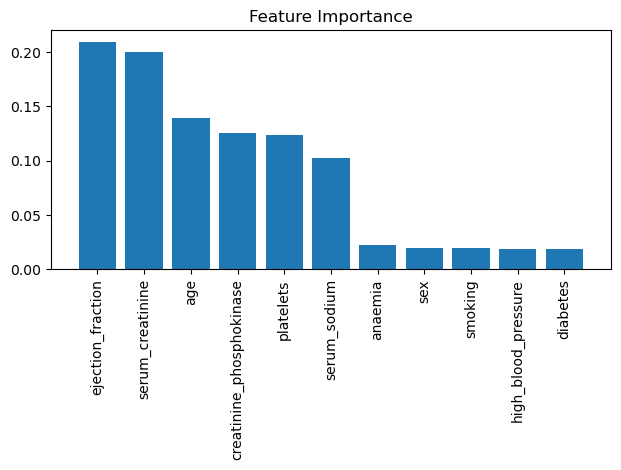

In [72]:
from sklearn.ensemble import RandomForestClassifier

feat_labels=heart_df.columns[:-1]
rf=RandomForestClassifier(n_estimators=500,random_state=1)
rf.fit(X_train,y_train)
importances=rf.feature_importances_
indices=np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("{:2d} {:25s} {:.3f}".format(f+1, feat_labels[indices[f]], importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]),feat_labels[indices], rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.show()

<b>Observation</b>: ejection_fraction, and serum_creatinine are the top two predictors. 

# Select features with SelectFromModel

Useful when we need to use a Pipeline object. Based on a predefined threshold set by the user.

In [73]:
from sklearn.feature_selection import SelectFromModel
sfm=SelectFromModel(rf,threshold=0.15, prefit=True)
X_selected=sfm.transform(X_train)
X_test_selected=sfm.transform(X_test)
print("Number of samples that meet this criterion: ", X_selected.shape[0])

for f in range(X_selected.shape[1]):
    print("{:2d} {:25s} {:.3f}".format(f+1, feat_labels[indices[f]], importances[indices[f]]))

Number of samples that meet this criterion:  209
 1 ejection_fraction         0.210
 2 serum_creatinine          0.200


More on feature selction: https://scikit-learn.org/stable/modules/feature_selection.html 

# Debugging Algorithms

Uses <b>learning</b> and <b>validation</b> curves.

Diagnose <b>high variance (overfitting)</b> or <b>high bias (underfitting)</b> using <b>learning curves</b>.

Diagnose common issues with learning algorithms using <b>validation curves</b>.


# a) Learning Curves

Plots model training and validation accuracies as functions of the training set size.

Model with high bias (underfitting): Low training and cross-validation accuracy. Can be addressed by increasing the number of model parameters/features (either by more data collection or feature construction) or decreasing the degree of regularization.

Model with high variance(overfitting): Large gap between training and cross-validation accuracy. May be addressd by collecting more training data, reducing model complexity, or increasing the regularization parameter (for regularized models). You may reduce the number of features through feature selection or feature extraction to decrease overfitting for unegularized models.  Careful if the training examples are very noisy...in that case you may also need to reduce the noise.

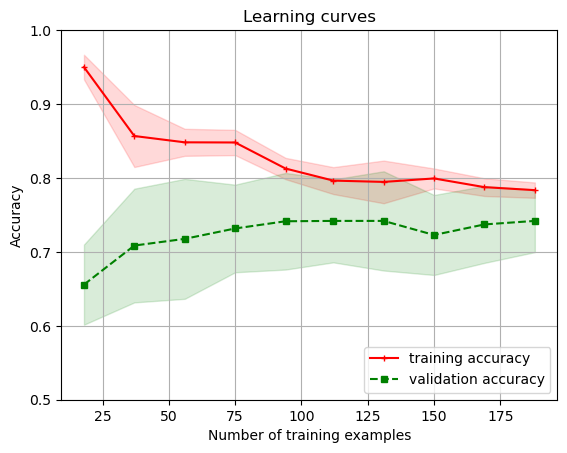

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve, StratifiedKFold,cross_val_score

lr_model=LogisticRegression(random_state=1)
#learning_curve uses stratified k-fold cross validation
train_sizes, train_scores, test_scores=learning_curve(estimator=lr_model, X=X_train, y=y_train,\
                                                     train_sizes=np.linspace(0.1,1.0,10),cv=10,n_jobs=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1) #used to indicate the variance of estimate.

test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)

plt.plot(train_sizes, train_mean, color='red', marker='+', markersize=5, label='training accuracy')

plt.fill_between(train_sizes, train_mean+train_std, train_mean-train_std, alpha=0.15, color='red')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')

plt.fill_between(train_sizes, test_mean+test_std, test_mean-test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.title("Learning curves")
plt.legend(loc='lower right')
plt.ylim([0.5,1.0])
plt.show()

Question: How well does our model perform?

Good performance from around 100 samples. With fewer examples we have overfitting--the gap between training and validation accuracy increases.

# b) Validation curves

Used to improve model performance by addressing overfitting and underfitting.

Plots accuracy against variations in a model parameter.

Consider varying the regularization parameter c in logistic regression.

Params:: dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


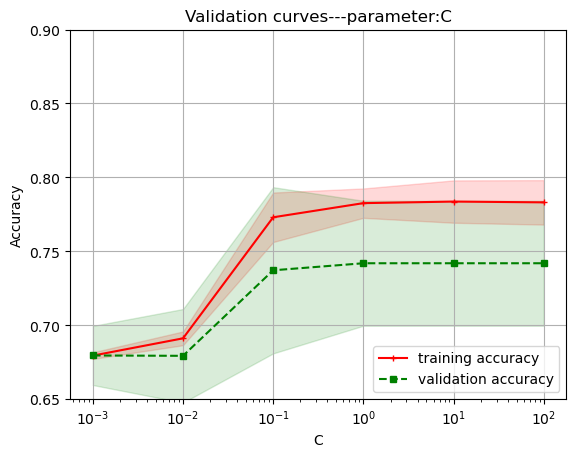

In [75]:
from sklearn.model_selection import validation_curve

param_range=[0.001, 0.01, 0.1,1.0,10.0, 100.0]
lr_model2=LogisticRegression(random_state=1)

print("Params::",lr_model2.get_params().keys())
#Uses stratified k-fold cross-validation.
train_scores, test_scores=validation_curve(estimator=lr_model2, X=X_train, y=y_train,\
                                                     param_name='C', \
                                         param_range=param_range,cv=10)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1) #used to indicate the variance of estimate.

test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)


plt.plot(param_range, train_mean, color='red', marker='+', markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean+train_std, train_mean-train_std, alpha=0.15, color='red')

plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')

plt.fill_between(param_range, test_mean+test_std, test_mean-test_std, alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Validation curves---parameter:C")
plt.legend(loc='lower right')
plt.ylim([0.65,0.9])
plt.show()

Observation: Towards c=100, there seems to be overfitting. Between c=0.001 to c=0.01 seems the better range. 

Params:: dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


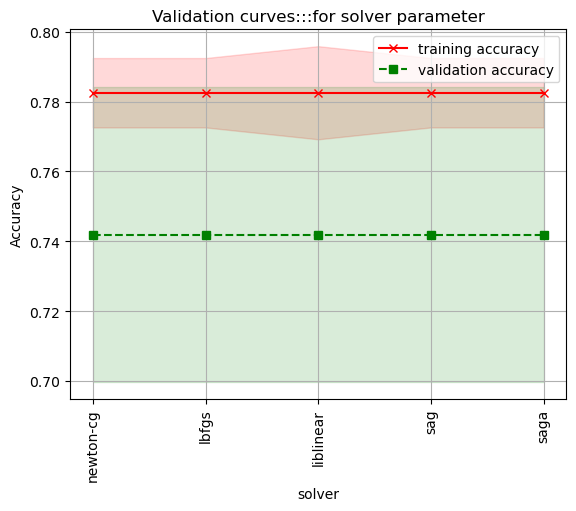

In [76]:
from sklearn.model_selection import validation_curve

param_range=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
lr_model2=LogisticRegression(random_state=1)

print("Params::",lr_model2.get_params().keys())
#Uses stratified k-fold cross-validation.
train_scores, test_scores=validation_curve(estimator=lr_model2, X=X_train, y=y_train,\
                                                     param_name='solver', \
                                         param_range=param_range,cv=10)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1) #used to indicate the variance of estimate.

test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)


plt.plot(param_range, train_mean, color='red', marker='x', markersize=6, label='training accuracy')

plt.fill_between(param_range, train_mean+train_std, train_mean-train_std, alpha=0.15, color='red')

plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=6, label='validation accuracy')

plt.fill_between(param_range, test_mean+test_std, test_mean-test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('solver')
plt.ylabel('Accuracy')
plt.title("Validation curves:::for solver parameter")
plt.xticks(range(len(param_range)),param_range, rotation=90)
plt.legend(loc='upper right')
plt.show()

# Multilayer Perceptron: With or without feature selection.

#### Initial Model with All Features

In [77]:
from sklearn.neural_network import MLPClassifier

#Model with all the features
mlp = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=(10, 4), \
                    solver='lbfgs', activation='relu', batch_size=32)
#solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
#activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’

#Working with the original dataset after scaling
mlp.fit(X_train, y_train)
predictions=mlp.predict(X_test)
score=mlp.score(X_test, y_test)
score

0.6555555555555556

#### Another Model with Selected Features

In [78]:
#Model with selected features
mlp = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=(10,4), solver='lbfgs', activation='relu', batch_size=32)
#solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
#activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’

#Working with selected features.
mlp.fit(X_selected, y_train)
predictions=mlp.predict(X_test_selected)
score=mlp.score(X_test_selected, y_test)
score

0.7111111111111111

# Other Feature Selection

Remove features with low variance

In [79]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(.65 * (1 - .65)))
X_train_var_thresh=sel.fit_transform(X_train)
X_test_var_thresh=sel.transform(X_test)
X_train_var_thresh.shape, X_test_var_thresh.shape

((209, 11), (90, 11))

In [80]:
mlp = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=(10, 4), solver='lbfgs', activation='relu', batch_size=32)
#solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
#activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’

#Working with selected features.
mlp.fit(X_train_var_thresh, y_train)
predictions=mlp.predict(X_test_var_thresh)
score=mlp.score(X_test_var_thresh, y_test)
score

0.6555555555555556

# Compare Algorithms in Batch Mode 
This aims to identify promising candidate algorithms that should be explored further.

In [81]:
#pip install lazypredict

In [82]:
#pip install pycaret

# Implementing Perceptron and ADALINE learning strategies

In [83]:
from matplotlib.colors import ListedColormap

The following examples  have been derived(with little adjustment) from:

Sebastian Raschka & Vahid Mirjalili (2017), Python Machine Learning, 2nd Edition- Machine Learning and Deep Learning with Python,scikit-learn, and TensorFlow. Packt.

Link: https://cmu.primo.exlibrisgroup.com/permalink/01CMU_INST/6lpsnm/alma991019579188304436

# Implementing Perceptron classifier---problem should be linearly separable

In [84]:
class Perceptron(object):
    '''perceptron classifier
    
    paremeters:#set at the start
    miu: float (ranges 0 to 1)---learning rate
    n_iter: int (number of iterations aka epochs)---how many times to pass through the dataset. NUmber of epochs.
    random_state: int (random number generator seed for random weight initialization)
    
    attributes: #set at training
    w_: 1d-array (weights after fitting)
    errors_: list (number of misclassifications (updates) in each epoch)
    '''
    
    def __init__(self, miu=0.01,n_iter=5, random_state=1):
        self.miu=miu
        self.n_iter=n_iter
        self.random_state=random_state
        
    def fit(self, X, y):
        '''
        Learn from the training data
        parameters:
        X:{array_like}, shape={n_samples, n_features}--training vectors
        y:array-like, shape={n_samples}---target values---correct/ground truth values
        
        returns:
        self:object
        '''
        
        rgen=np.random.RandomState(self.random_state) #seeding allows producing previous results if needed.
        self.w_=rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1]) #we just want small random values.
                    #weights from normal distribution with stdev=0.01
        print("----weights----", self.w_)
        self.errors_=[]
        
        for _ in  range(self.n_iter):
            errors=0
            for xi, target in zip(X,y):
                update=self.miu*(target-self.predict(xi))
                self.w_[1:]+=update*xi
                
                self.w_[0]+=update*1  #self.w_[0] is weight of bias unit.
                
                errors+=int(update!=0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self,X): #result of wTx
        '''Calculate net input'''
        return np.dot(X,self.w_[1:])+self.w_[0]
    
    def predict(self, X):
        '''Return class label after unit step'''
        return np.where(self.net_input(X)>=0.0, 1, -1)

In [85]:
#Two class classification---setosa and versicolor.
df=pd.read_csv('iris_dataset.csv')
df.sample(6)

,sepallength,sepalwidth,petallength,petalwidth,class
1,4.9,3.0,1.4,0.2,Iris-setosa
77,6.7,3.0,5.0,1.7,Iris-versicolor
68,6.2,2.2,4.5,1.5,Iris-versicolor
62,6.0,2.2,4.0,1.0,Iris-versicolor
61,5.9,3.0,4.2,1.5,Iris-versicolor
65,6.7,3.1,4.4,1.4,Iris-versicolor


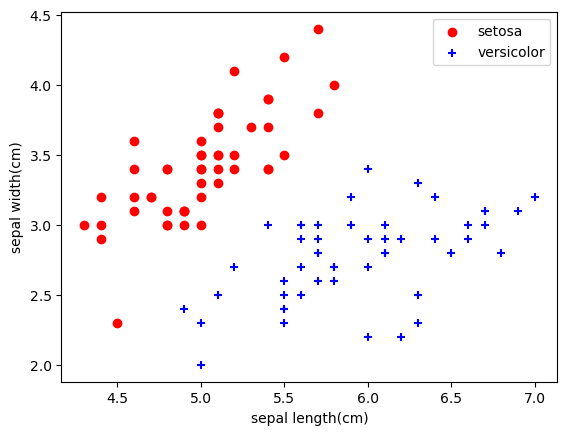

In [86]:
#Extract the first 100 instances---the setosas and versicolors
#convert the classes to -1(setosa), 1 (versicolor)
y=df.iloc[0:100,4].values
y=np.where(y=='Iris-setosa',-1,1)

#extract features
X=df.iloc[0:100,0:2].values

#plot the data for exploration
plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='+', label='versicolor')
plt.xlabel('sepal length(cm)')
plt.ylabel('sepal width(cm)')
plt.legend(loc='upper right')
plt.show()

See the above plot shows that the data is linearly separable for two columns. Therefore, we can use a linear classifier like the perceptron

In [87]:
X.shape

(100, 2)

In [88]:
df.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


----weights---- [ 0.01624345 -0.00611756 -0.00528172]


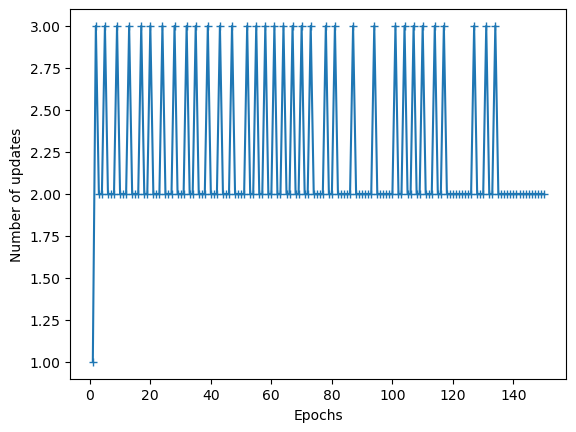

In [89]:
#Let's train the perceptron
ppn=Perceptron(miu=0.1, n_iter=150)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_, marker='+')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [90]:
#Visualize the decision boundary
def plot_decision_regions(X,y,classifier, step=0.01):
    #set up marker generator and color map
    markers=['s','x','o','^','v']
    colors=['red','blue', 'lightgreen','gray','cyan']
    cmap=ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1
    
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,step),np.arange(x2_min,x2_max,step))
    Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T) #ravel flattens the array
    Z=Z.reshape(xx1.shape)
    
    plt.contourf(xx1,xx2,Z,alpha=0.1, cmap=cmap) #alpha: between 0(transparent) and 1(opaque)--change it and see the variations
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    #Plot class samples
    for idx,cl in enumerate(np.unique(y)): #idx: index, cl: class (setosa, versicolor, etc)
        plt.scatter(x=X[y==cl,0], y=X[y==cl,1], \
                    alpha=0.8, c=colors[idx], label=cl, edgecolor='black')

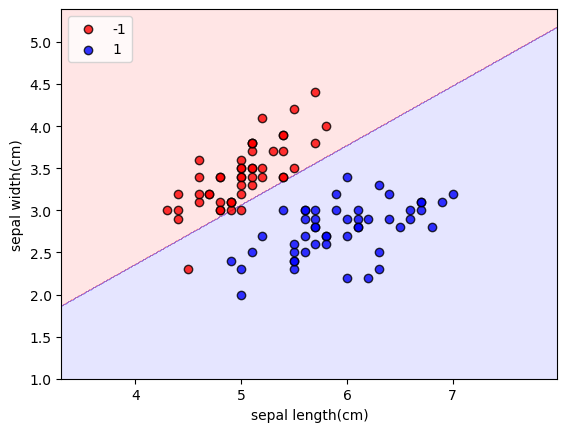

In [91]:
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel('sepal length(cm)')
plt.ylabel('sepal width(cm)')
plt.legend(loc='upper left')
plt.show()

# Implementing ADAptive LInear NEuron(ADALINE) using Batch Gradient Descent

In [92]:
class AdalineGD(object):
    '''ADAptive LInear NEuron classifier
    
    This solution uses batch gradient descent.
    
    paremeters:#set at the start
    miu: float (ranges 0 to 1)---learning rate
    
    n_iter: int (number of iterations aka epochs)---how many times to pass through the dataset. NUmber of epochs.
    
    random_state: int (random number generator seed for random weight initialization)
    
    attributes: #set at training
    w_: 1d-array (weights after fitting)
    
    cost_: list (sum of squares cost function value in each epoch)
    '''
    
    def __init__(self, miu=0.01,n_iter=5, random_state=1):
        self.miu=miu
        self.n_iter=n_iter
        self.random_state=random_state
        
    def fit(self, X, y):
        '''
        Learn from the training data
        parameters:
        X:{array_like}, shape={n_samples, n_features}--training vectors
        y:array-like, shape={n_samples}---target values---correct/ground truth values
        
        returns:
        self:object
        '''
        
        rgen=np.random.RandomState(self.random_state) #seeding allows producing previous results if needed.
        self.w_=rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1]) #we just want small random values.
                    #weights from normal distribution with stdev=0.01
        self.cost_=[]
        
        for _ in  range(self.n_iter):
            net_input=self.net_input(X)
            output=self.activation(net_input)
            errors=(y-output) 
            #print(errors)
            #print( "----output: ",output,"----errors: ",errors)
            self.w_[1:]+=self.miu*X.T.dot(errors)
            
            self.w_[0]+=self.miu*errors.sum() #self.w_[0] is weight of bias unit.
            
            cost=(errors**2).sum()/2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self,X): #result of wTx---the summation
        '''Calculate net input'''
        return np.dot(X,self.w_[1:])+self.w_[0]
    
    def activation(self,X): #uses activation function, e.g. linear, sigmoid, relu, tanh,etc.
        '''Calculate linear activation'''
        return X #identity
    
    def predict(self, X):
        '''Return class label after unit step'''
        return np.where(self.activation(self.net_input(X))>=0.0, 1, -1)

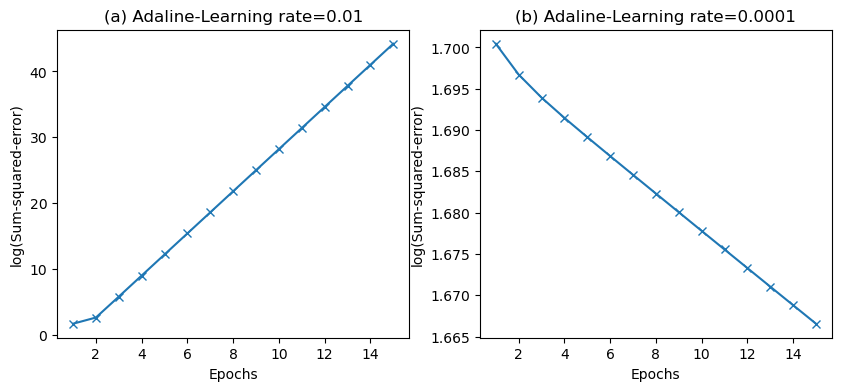

In [93]:
#Plotting for different learning rates
fig,ax=plt.subplots(nrows=1,ncols=2, figsize=(10,4))

ada1=AdalineGD(n_iter=15, miu=0.01).fit(X,y)
ax[0].plot(range(1,len(ada1.cost_)+1),np.log10(ada1.cost_), marker='x') #len(ada1.cost_)--same as number of epochs
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('(a) Adaline-Learning rate=0.01')

ada2=AdalineGD(n_iter=15, miu=0.0001).fit(X,y)
ax[1].plot(range(1,len(ada2.cost_)+1),np.log10(ada2.cost_), marker='x')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('(b) Adaline-Learning rate=0.0001')

plt.show()

#In a) the errors are increasing because the learning rate is so large that it potentially overshoots the global minimum.
#In b), the learning rate is so small that it may requires so many epochs to converge to the global cost minimum.

#What happens if we scale the data? Let's use standardization x_new=(x_old-mean(x_values))/sdv(x_values)

In [94]:
X_std=np.copy(X) #copy the X values
X_std[:,0]=(X[:,0]-X[:,0].mean())/X[:,0].std() #this is what StandardScaler does
X_std[:,1]=(X[:,1]-X[:,1].mean())/X[:,1].std()

In [95]:
X_std.shape

(100, 2)

In [96]:
X_std[:4,:]

array([[-0.5810659 ,  0.85713543],
       [-0.89430898, -0.19845007],
       [-1.20755205,  0.22378413],
       [-1.36417359,  0.01266703]])

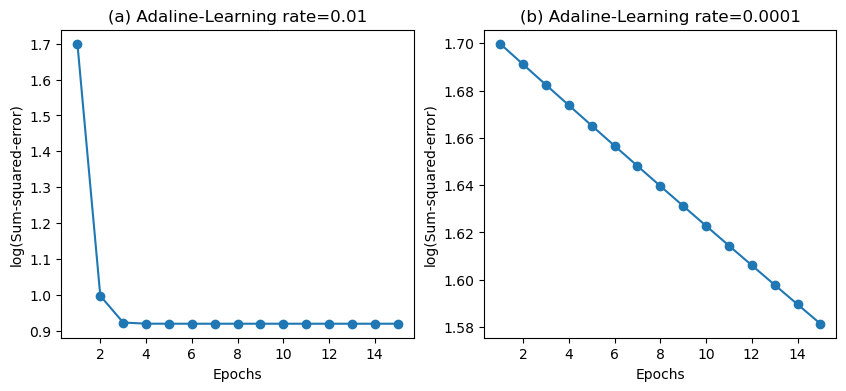

In [97]:
#Plotting for different learning rates
fig,ax=plt.subplots(nrows=1,ncols=2, figsize=(10,4))

ada1=AdalineGD(n_iter=15, miu=0.01).fit(X_std,y)
ax[0].plot(range(1,len(ada1.cost_)+1),np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('(a) Adaline-Learning rate=0.01')

ada2=AdalineGD(n_iter=15, miu=0.0001).fit(X_std,y)
ax[1].plot(range(1,len(ada2.cost_)+1),np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('(b) Adaline-Learning rate=0.0001')

plt.show()

#See the behavior of a) and b). Also notice that standardized values have helped with the early convergence with 0.01 learning rate.

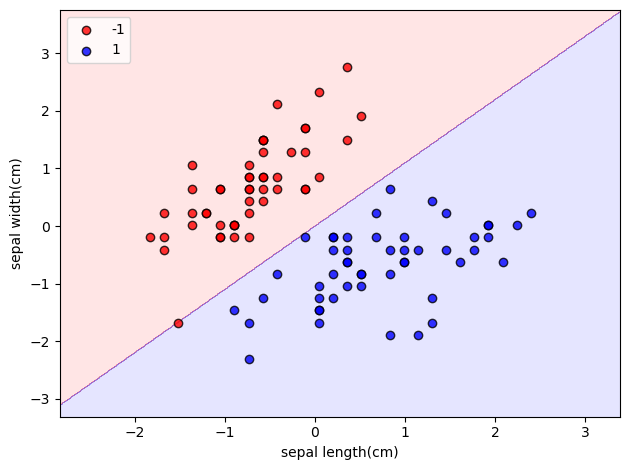

In [98]:
#Now let's plot the decision boundary
ada=AdalineGD(n_iter=15, miu=0.01).fit(X_std,y)

plot_decision_regions(X_std,y,classifier=ada)
plt.xlabel('sepal length(cm)')
plt.ylabel('sepal width(cm)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

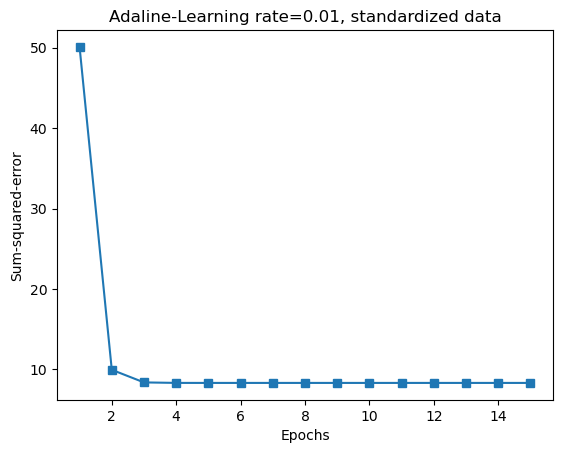

In [99]:
#Plot the errors per epoch
plt.plot(range(1,len(ada.cost_)+1), ada.cost_,marker='s')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.title('Adaline-Learning rate=0.01, standardized data')
plt.show()

# Implementing ADAptive LInear NEuron(ADALINE) using Stochastic Gradient Descent

In [100]:
class AdalineSGD(object):
    '''ADAptive LInear NEuron classifier
    
    This solution uses stochastic gradient descent.
    
    paremeters:#set at the start
    miu: float (ranges 0 to 1)---learning rate
    
    n_iter: int (number of iterations aka epochs)---how many times to pass through the dataset. NUmber of epochs.
    
    random_state: int (random number generator seed for random weight initialization)
    
    shuffle: bool (default:True) (shuffles the the training data every epoch if True) to prevent cycles.
    
    attributes: #set at training
    w_: 1d-array (weights after fitting)
    
    cost_: list (sum of squares cost function value averaged over all training samples in each epoch)
    '''
    
    def __init__(self, miu=0.01,n_iter=5, shuffle=True, random_state=1):
        self.miu=miu
        self.n_iter=n_iter
        self.random_state=random_state
        self.shuffle=shuffle
        self.w_initialized=False
        
    def fit(self, X, y):
        '''
        Learn from the training data
        parameters:
        X:{array_like}, shape={n_samples, n_features}--training vectors
        y:array-like, shape={n_samples}---target values---correct/ground truth values
        
        returns:
        self:object
        '''
        self._initialize_weights(X.shape[1])
        self.cost_=[]
        
        for _ in  range(self.n_iter):
            if self.shuffle:
                X,y=self._shuffle(X,y)
            cost=[]
            for xi, target in zip(X,y):
                cost.append(self._update_weights(xi,target))
            avg_cost=sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        '''
        Can be used in online learning scenarios with streaming data.
        
        Fits data without re-initializing the weights.
        
        Learn from the training data
        
        parameters:
        X:{array_like}, shape={n_samples, n_features}--training vectors
        y:array-like, shape={n_samples}---target values---correct/ground truth values
        
        returns:
        self:object
        '''
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0]>1:
            for xi,target in zip(X,y):
                self._update_weights(xi,target)
                
        else:
            self._update_weights(X,y)
        
        return self
    
    def _shuffle(self,X,y):
        '''
        Shuffles the training data
        '''
        r=self.rgen.permutation(len(y))
        return X[r],y[r]
        
        
    def _initialize_weights(self,m):
        '''
        Initializes weights to small random numbers
        '''
        self.rgen=np.random.RandomState(self.random_state) #seeding allows producing previous results if needed.
        self.w_=self.rgen.normal(loc=0.0, scale=0.01, size=1+m) #we just want small random values.
                    #weights from normal distribution with stdev=0.01
        self.w_initialized=True
    
    def _update_weights(self,xi,target):
        '''
        Apply Adaline learning rule to update the weights.
        '''
        output=self.activation(self.net_input(xi))
        error=(target-output) 
        print("----xi: ",xi, "----output: ",output,"----error: ",error)
        self.w_[1:]+=self.miu*xi.dot(error)
        self.w_[0]+=self.miu*error #self.w_[0] is weight of bias unit.
        cost=(error**2)/2.0
        return cost
       
    def net_input(self,X): #result of wTx---the summation
        '''Calculate net input'''
        return np.dot(X,self.w_[1:])+self.w_[0]
    
    def activation(self,X): #uses activation function
        '''Calculate linear activation'''
        return X
    
    def predict(self, X):
        '''Return class label after unit step'''
        return np.where(self.activation(self.net_input(X))>=0.0, 1, -1)

----xi:  [ 0.51528486 -1.04291848] ----output:  0.018599566265870178 ----error:  0.9814004337341298
----xi:  [-0.5810659   1.49048673] ----output:  0.003545941785218408 ----error:  -1.0035459417852184
----xi:  [1.29839254 0.43490123] ----output:  0.00896278926425399 ----error:  0.991037210735746
----xi:  [ 0.51528486 -0.83180138] ----output:  0.056784857780022666 ----error:  0.9432151422199774
----xi:  [ 0.20204178 -1.25403558] ----output:  0.08256026961110463 ----error:  0.9174397303888954
----xi:  [ 0.20204178 -0.40956718] ----output:  0.06810064028467307 ----error:  0.9318993597153269
----xi:  [ 0.98514947 -0.62068428] ----output:  0.1103228875601209 ----error:  0.8896771124398791
----xi:  [ 1.76825716 -0.40956718] ----output:  0.1471094213792648 ----error:  0.8528905786207353
----xi:  [-0.73768744  0.22378413] ----output:  0.021282344605241053 ----error:  -1.021282344605241
----xi:  [-1.67741667 -0.19845007] ----output:  -0.023540617455775598 ----error:  -0.9764593825442244
----xi:

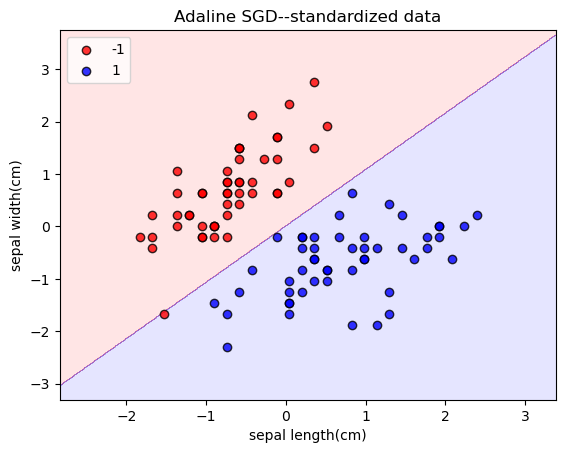

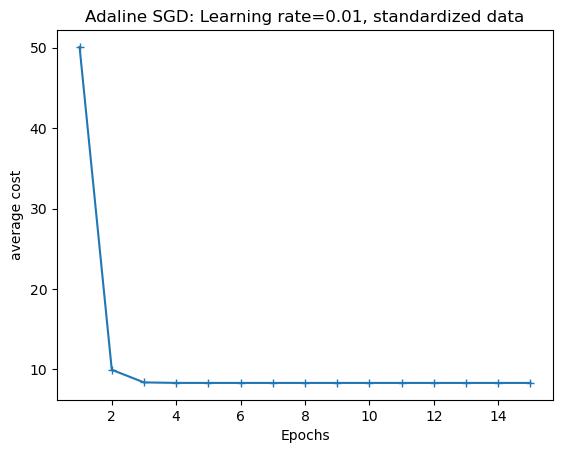

In [101]:
#test
adaSGD=AdalineSGD(n_iter=15, miu=0.01, random_state=1)
adaSGD.fit(X_std,y)

#plot the decision boundary
plot_decision_regions(X_std,y,classifier=adaSGD)
plt.xlabel('sepal length(cm)')
plt.ylabel('sepal width(cm)')
plt.legend(loc='upper left')
plt.title('Adaline SGD--standardized data')
plt.show()

#Plot the errors per epoch
plt.plot(range(1,len(ada.cost_)+1), ada.cost_,marker='+')
plt.xlabel('Epochs')
plt.ylabel('average cost')
plt.title('Adaline SGD: Learning rate=0.01, standardized data')
plt.show()


In [102]:
adaSGD.partial_fit(X_std[0,:],y[0]) #Online learning demo

----xi:  [-0.5810659   0.85713543] ----output:  -0.8409344734450402 ----error:  -0.15906552655495976
